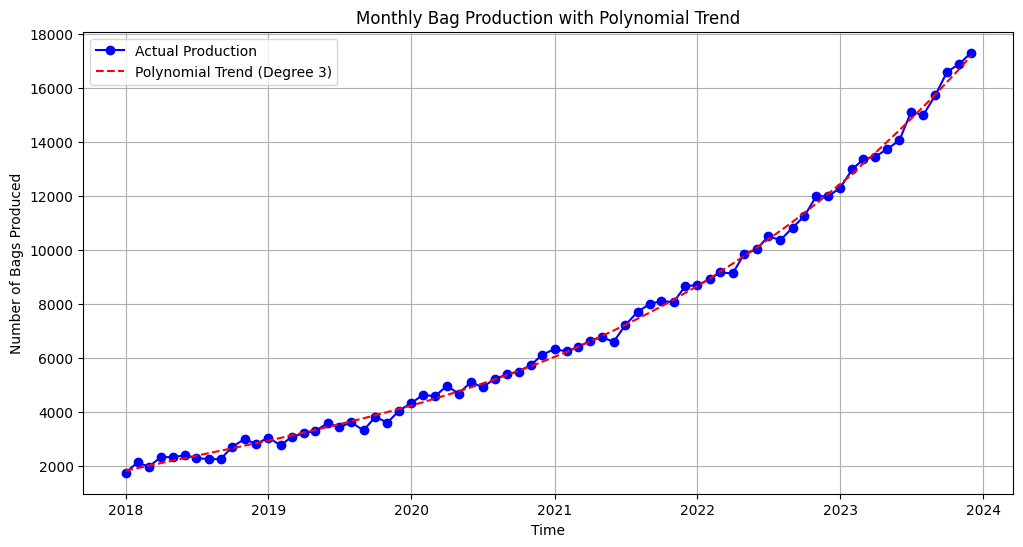

Polynomial Coefficients: ['0.031', '-0.489', '94.389', '1813.558']


D:\TEMP\ipykernel_17888\3703720085.py:56: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  term = (p.deriv(i)(a) * (x - a)**i) / np.math.factorial(i)


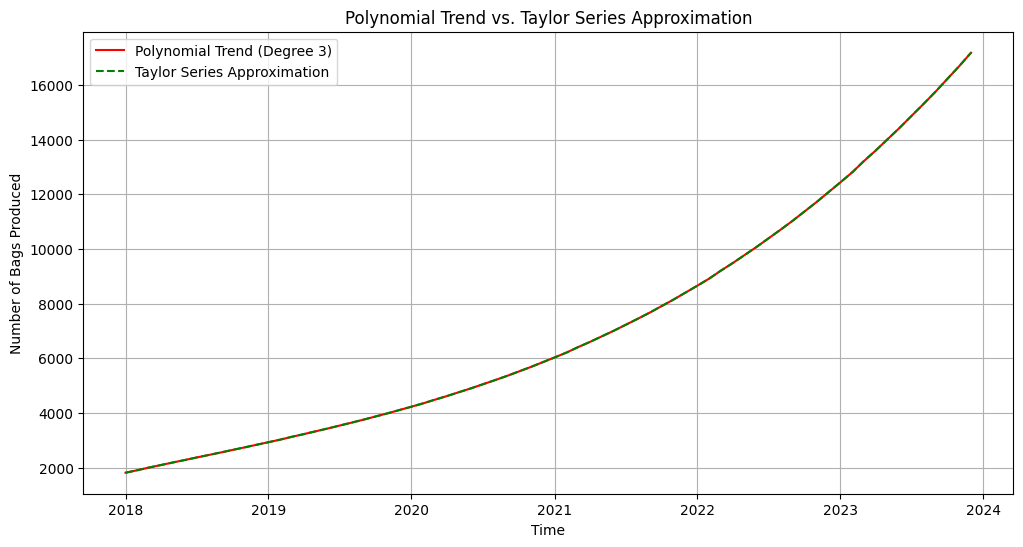

Production exceeds 25,000 bags in: 2025-01
Start building the new warehouse by: 2023-12
Root Result (Month when production exceeds 25,000 bags): 84.420
Month to start building the warehouse: 71.420


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Load the Excel file
file_path = 'data.xlsx'
data = pd.read_excel(file_path, sheet_name='in')

# Extract the production data
production_data = data.iloc[0].values

# Assuming there are two measurements per month, we need to aggregate these
if len(production_data) == 144:
    production_data = production_data.reshape(-1, 2).mean(axis=1)

# Create a timeline from January 2018 to December 2023
timeline = pd.date_range(start='2018-01', periods=len(production_data), freq='MS')

# Problem 1: Polynomial Regression Model
# Reason: Polynomial regression allows for capturing nonlinear trends in the data.
months_since_start = np.arange(len(production_data))

# Fit a polynomial of degree 3 using numpy's polyfit and poly1d
degree = 3
coefficients = np.polyfit(months_since_start, production_data, degree)
p = np.poly1d(coefficients)

# Evaluate the polynomial model
production_trend = p(months_since_start)

# Plot the production data and the polynomial trend
plt.figure(figsize=(12, 6))
plt.plot(timeline, production_data, marker='o', linestyle='-', color='b', label='Actual Production')
plt.plot(timeline, production_trend, linestyle='--', color='r', label=f'Polynomial Trend (Degree {degree})')
plt.title('Monthly Bag Production with Polynomial Trend')
plt.xlabel('Time')
plt.ylabel('Number of Bags Produced')
plt.legend()
plt.grid(True)
plt.show()

# Display the polynomial coefficients with three-digit precision
print("Polynomial Coefficients:", [f"{coef:.3f}" for coef in coefficients])

# Problem 2: Polynomial Function (Taylor Series Approximation)
# Reason: Using the Taylor series for numerical approximation to meet the requirement.

# Derive the Taylor series expansion
def taylor_series_approximation(x, a, n):
    """
    Compute the Taylor series approximation of the polynomial p(x) centered at a up to n terms.
    """
    approximation = p(a)
    for i in range(1, n+1):
        term = (p.deriv(i)(a) * (x - a)**i) / np.math.factorial(i)
        approximation += term
    return approximation

# Choose the center of expansion (a) and the number of terms (n) for the Taylor series
a = months_since_start[len(months_since_start) // 2]  # center around the midpoint
n = 3  # considering up to the third derivative

# Apply the Taylor series approximation
production_taylor = taylor_series_approximation(months_since_start, a, n)

# Plot the polynomial trend and its Taylor series approximation
plt.figure(figsize=(12, 6))
plt.plot(timeline, production_trend, linestyle='-', color='r', label=f'Polynomial Trend (Degree {degree})')
plt.plot(timeline, production_taylor, linestyle='--', color='g', label='Taylor Series Approximation')
plt.title('Polynomial Trend vs. Taylor Series Approximation')
plt.xlabel('Time')
plt.ylabel('Number of Bags Produced')
plt.legend()
plt.grid(True)
plt.show()

# Problem 3: Warehouse Capacity Prediction using Newton-Raphson Method
# Reason: Newton-Raphson method is an efficient way to find roots of equations.

def production_model(x):
    return taylor_series_approximation(x, a, n)

def root_function(x):
    return production_model(x) - 25000

# Define the derivative of the root function
def d_root_function(x):
    return np.polyder(p)(x)

# Initial guess
initial_guess = months_since_start[-1]

# Find the root using Newton-Raphson method
exceed_month = newton(root_function, initial_guess, fprime=d_root_function)

# Calculate when to start building the new warehouse (13 months before exceeding capacity)
build_start_month = exceed_month - 13

# Convert months since start to date
exceed_date = pd.Timestamp('2018-01-01') + pd.DateOffset(months=int(exceed_month))
build_start_date = pd.Timestamp('2018-01-01') + pd.DateOffset(months=int(build_start_month))

print(f"Production exceeds 25,000 bags in: {exceed_date.strftime('%Y-%m')}")
print(f"Start building the new warehouse by: {build_start_date.strftime('%Y-%m')}")

# Output the root results with three-digit precision
print(f"Root Result (Month when production exceeds 25,000 bags): {exceed_month:.3f}")
print(f"Month to start building the warehouse: {build_start_month:.3f}")
